In [99]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [100]:
def get_combined_df(task):
    df_ac = pd.read_csv(f"/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/Actor_Critic.csv")
    df_greedy=pd.read_csv(f"/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/Greedy.csv")
    df_sarsa=pd.read_csv(f"/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/SARSA.csv")
    df_qlearn=pd.read_csv(f"/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/QLearn.csv")
    df_reinforce=pd.read_csv(f"/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/Reinforce.csv")
    df_naive=pd.read_csv(f"/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/Naive.csv")
    df_random=pd.read_csv(f'/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/Random.csv')
    df_wsls=pd.read_csv(f'/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/WSLS.csv')
    df_elimination=pd.read_csv(f'/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/VizRec/{task}/PM.csv')
    # Add a new column to each dataframe with the name of the dataframe
    df_ac['Algo'] = 'ActorCritic'
    df_greedy['Algo'] = 'Greedy'
    df_sarsa['Algo'] = 'SARSA'
    df_qlearn['Algo'] = 'QLearn'
    df_reinforce['Algo'] = 'Reinforce'
    df_naive['Algo'] = 'Naive'
    df_random['Algo'] = 'Random'
    df_wsls['Algo'] = 'WSLS'
    df_elimination['Algo']='ET'

    # Add a new column to each dataframe to keep track of the original index
    df_ac['original_dataframe_index'] = range(len(df_ac))
    df_greedy['original_dataframe_index'] = range(len(df_greedy))
    df_sarsa['original_dataframe_index'] = range(len(df_sarsa))
    df_qlearn['original_dataframe_index'] = range(len(df_qlearn))
    df_reinforce['original_dataframe_index'] = range(len(df_qlearn))
    df_naive['original_dataframe_index'] = range(len(df_naive))
    df_random['original_dataframe_index'] = range(len(df_random))
    df_wsls['original_dataframe_index'] = range(len(df_wsls))
    df_elimination['original_dataframe_index'] = range(len(df_elimination))
    #df_tamerq['original_dataframe_index'] = range(len(df_tamerq))

    # Combine the dataframes into one
    df_combined = pd.concat([df_ac, df_greedy, df_sarsa, df_qlearn,df_reinforce,df_naive,df_random,df_wsls,df_elimination])

    # Reset the index of the combined dataframe
    df_combined = df_combined.reset_index(drop=True)
    return df_combined


In [102]:

df_combined_openended = get_combined_df('p4')
df_combined_goal_directed = get_combined_df('p2')
path2='/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/viz-rec-experiments-master-p2.csv'
df_combined_goal_directed.to_csv(path2)
path4='/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/viz-rec-experiments-master-p4.csv'
df_combined_openended.to_csv(path4)


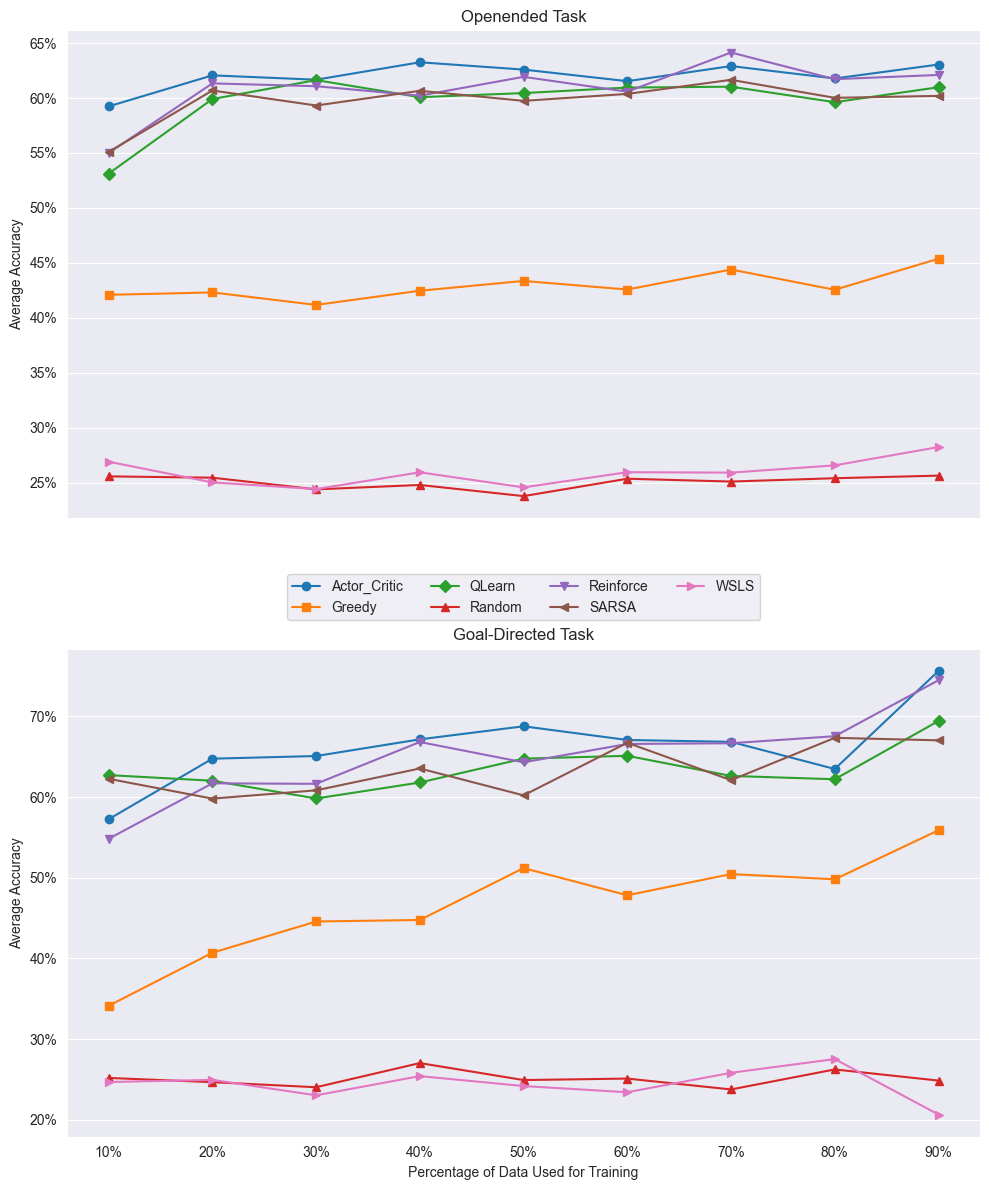

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df_combined_goal_directed = pd.read_csv(path2)
df_combined_openended = pd.read_csv(path4)

# Drop rows where 'Algorithm' is 'Naive' or 'PM' for both DataFrames
df_combined_goal_directed = df_combined_goal_directed[(df_combined_goal_directed['Algorithm'] != 'Naive') & (df_combined_goal_directed['Algorithm'] != 'PM') & (df_combined_goal_directed['Threshold'] != 0.05)]
df_combined_openended = df_combined_openended[(df_combined_openended['Algorithm'] != 'Naive') & (df_combined_openended['Algorithm'] != 'PM') & (df_combined_openended['Threshold'] != 0.05)]

# Calculate the average accuracy for each threshold and algorithm
df_avg_goal_directed = df_combined_goal_directed.groupby(['Threshold', 'Algorithm'])['Accuracy'].mean().reset_index()
df_avg_openended = df_combined_openended.groupby(['Threshold', 'Algorithm'])['Accuracy'].mean().reset_index()


# Define markers for each algorithm
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H', '+', 'x']

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
# Plot data for df_combined
for idx, algorithm in enumerate(df_avg_openended['Algorithm'].unique()):
    algo_data = df_avg_openended[df_avg_openended['Algorithm'] == algorithm]
    ax1.plot(algo_data['Threshold'], algo_data['Accuracy'], marker=markers[idx], label=algorithm)

for idx, algorithm in enumerate(df_avg_goal_directed['Algorithm'].unique()):
    algo_data = df_avg_goal_directed[df_avg_goal_directed['Algorithm'] == algorithm]
    ax2.plot(algo_data['Threshold'], algo_data['Accuracy'], marker=markers[idx], label=algorithm)


# Set labels and title for both plots
ax1.set_ylabel('Average Accuracy')
ax1.set_title('Openended Task')
ax1.legend(loc="upper center", bbox_to_anchor=(0.5, -0.10), ncol=4)
ax1.grid(axis='x')

ax2.set_xlabel('Percentage of Data Used for Training')
ax2.set_ylabel('Average Accuracy')
ax2.set_title('Goal-Directed Task')
ax2.grid(axis='x')

# Function to format x-axis ticks as percentages
def percentage(x, pos):
    return '{:.0%}'.format(x)

# Format x-axis ticks as percentages
formatter = FuncFormatter(percentage)
ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)

# Show the plots
plt.tight_layout()
plt.savefig('viz-rec-experiments-both.pdf')


In [104]:
import pandas as pd

# Assuming df_avg_goal_directed and df_avg_openended are DataFrames containing the average accuracy for each algorithm across different thresholds and percentages of training data

# Calculate overall average accuracy for each algorithm
avg_accuracy_goal_directed = df_avg_goal_directed.groupby('Algorithm')['Accuracy'].mean()
avg_accuracy_openended = df_avg_openended.groupby('Algorithm')['Accuracy'].mean()

# Print the overall average accuracy for each algorithm
print("Overall Average Accuracy (Goal-Directed Task):")
print(avg_accuracy_goal_directed)
print("\nOverall Average Accuracy (Openended Task):")
print(avg_accuracy_openended)


Overall Average Accuracy (Goal-Directed Task):
Algorithm
Actor_Critic    0.662232
Greedy          0.465931
QLearn          0.633855
Random          0.250915
Reinforce       0.649493
SARSA           0.633131
WSLS            0.244100
Name: Accuracy, dtype: float64

Overall Average Accuracy (Openended Task):
Algorithm
Actor_Critic    0.620102
Greedy          0.429199
QLearn          0.597539
Random          0.250484
Reinforce       0.609000
SARSA           0.597501
WSLS            0.259436
Name: Accuracy, dtype: float64


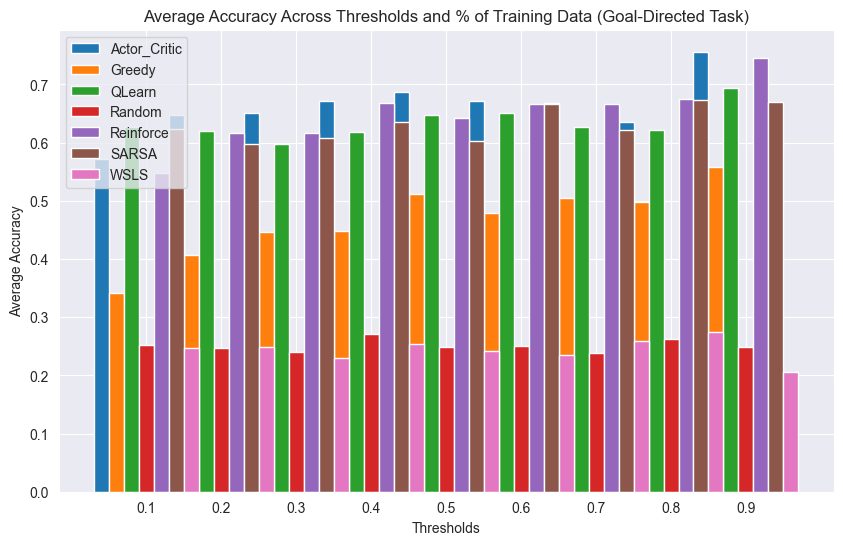

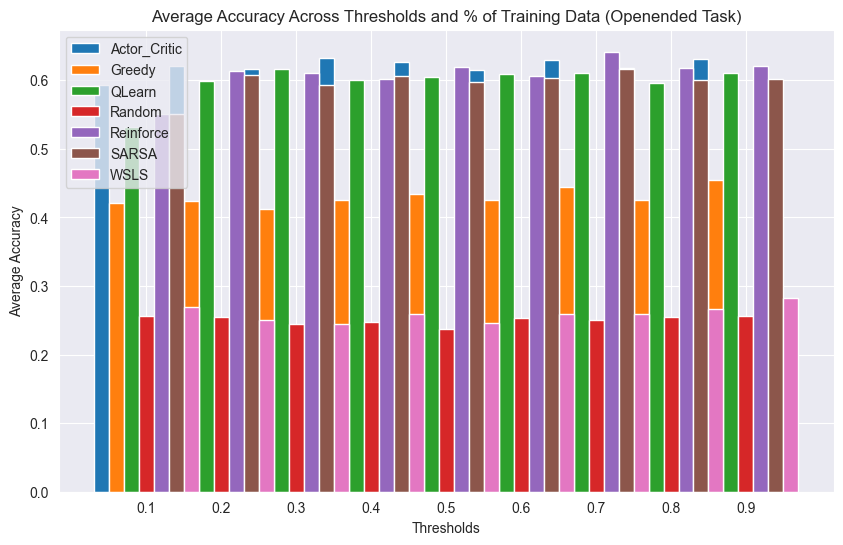

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_avg_goal_directed and df_avg_openended are DataFrames containing the average accuracy for each algorithm across different thresholds and percentages of training data

# Define function to plot bar plots for each algorithm
def plot_bar_plot(df, title):
    algorithms = df['Algorithm'].unique()
    num_algorithms = len(algorithms)
    thresholds = df['Threshold'].unique()
    num_thresholds = len(thresholds)
    bar_width = 0.2

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, algorithm in enumerate(algorithms):
        accuracy_values = []
        for threshold in thresholds:
            accuracy_value = df[(df['Algorithm'] == algorithm) & (df['Threshold'] == threshold)]['Accuracy'].values
            if len(accuracy_value) > 0:
                accuracy_values.append(accuracy_value[0])
            else:
                accuracy_values.append(0)
        bar_positions = np.arange(num_thresholds) + i * bar_width
        ax.bar(bar_positions, accuracy_values, bar_width, label=algorithm)

    ax.set_xlabel('Thresholds')
    ax.set_ylabel('Average Accuracy')
    ax.set_title(title)
    ax.set_xticks(np.arange(num_thresholds) + (num_algorithms - 1) * bar_width / 2)
    ax.set_xticklabels([str(threshold) for threshold in thresholds])
    ax.legend()
    plt.show()

# Plot bar plots for the "Goal-Directed Task"
plot_bar_plot(df_avg_goal_directed, 'Average Accuracy Across Thresholds and % of Training Data (Goal-Directed Task)')

# Plot bar plots for the "Openended Task"
plot_bar_plot(df_avg_openended, 'Average Accuracy Across Thresholds and % of Training Data (Openended Task)')


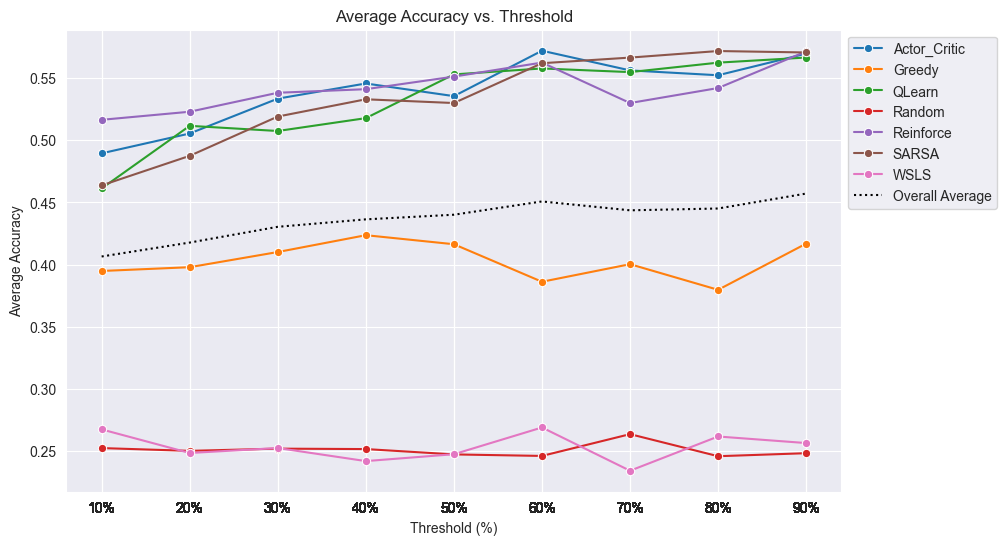

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_combined is your DataFrame
# Drop rows where 'Algorithm' is 'Naive'
df_combined = df_combined[df_combined['Algorithm'] != 'Naive']
df_combined = df_combined[df_combined['Algorithm'] != 'PM']

# Calculate the average accuracy for each threshold and algorithm
df_avg = df_combined.groupby(['Threshold', 'Algorithm'])['Accuracy'].mean().reset_index()

# Calculate the overall average accuracy for each threshold
df_overall_avg = df_combined.groupby('Threshold')['Accuracy'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot the data for each algorithm
plot = sns.lineplot(x='Threshold', y='Accuracy', hue='Algorithm', data=df_avg, marker='o')

# Plot the overall average line (dotted)
plt.plot(df_overall_avg['Threshold'], df_overall_avg['Accuracy'], linestyle='dotted', color='black', label='Overall Average')

# Set labels and title
plt.xlabel('Threshold (%)')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Threshold')

# Add markers for all thresholds on the x-axis
plt.xticks(df_combined['Threshold'], [f"{th:.0%}" for th in df_combined['Threshold']])

# Move the legend outside the plot
plot.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

